In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

In [2]:
#Read data from external csv file

data=pd.read_csv('housing.csv')
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [3]:
#Format input for neural network

def boolean_conversion(header:str)->np.ndarray:
    """
    Converts yes/no values to 1/0
    """

    values=data[header].values
    for i in range(len(values)):
        if values[i]=='yes':
            values[i]=1
        else:
            values[i]=0
    return values.reshape(-1,1)

#Numerical inputs
area=data['area'].values.reshape(-1,1)
bedrooms=data['bedrooms'].values.reshape(-1,1)
bathrooms=data['bathrooms'].values.reshape(-1,1)
stories=data['stories'].values.reshape(-1,1)
parking=data['parking'].values.reshape(-1,1)

#Boolean inputs
ainroad=boolean_conversion('mainroad')
guestroom=boolean_conversion('guestroom')
basement=boolean_conversion('basement')
hotwaterheating=boolean_conversion('hotwaterheating')
airconditioning=boolean_conversion('airconditioning')
prefarea=boolean_conversion('prefarea')

#Categorical input
furnishingstatus=data['furnishingstatus'].values
for i in range(len(furnishingstatus)):
    if furnishingstatus[i]=='furnished':
        furnishingstatus[i]=1
    elif furnishingstatus[i]=='semi-furnished':
        furnishingstatus[i]=0.5
    else:
        furnishingstatus[i]=0
furnishingstatus = furnishingstatus.reshape(-1,1)

model_in = np.hstack((area, bedrooms, bathrooms, stories, parking, ainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus))

In [4]:
#Format expected output

y=data['price'].values
print(y)

[13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000
  9870000  9800000  9800000  9681000  9310000  9240000  9240000  9100000
  9100000  8960000  8890000  8855000  8750000  8680000  8645000  8645000
  8575000  8540000  8463000  8400000  8400000  8400000  8400000  8400000
  8295000  8190000  8120000  8080940  8043000  7980000  7962500  7910000
  7875000  7840000  7700000  7700000  7560000  7560000  7525000  7490000
  7455000  7420000  7420000  7420000  7350000  7350000  7350000  7350000
  7343000  7245000  7210000  7210000  7140000  7070000  7070000  7035000
  7000000  6930000  6930000  6895000  6860000  6790000  6790000  6755000
  6720000  6685000  6650000  6650000  6650000  6650000  6650000  6650000
  6629000  6615000  6615000  6580000  6510000  6510000  6510000  6475000
  6475000  6440000  6440000  6419000  6405000  6300000  6300000  6300000
  6300000  6300000  6293000  6265000  6230000  6230000  6195000  6195000
  6195000  6160000  6160000  6125000  6107500  6090

In [5]:
max_iter=2000
learning_rate=0.001
activation_funtion = 'relu'

In [6]:
nn_model=MLPRegressor(hidden_layer_sizes=(512,128,64),max_iter=max_iter,learning_rate_init=learning_rate,activation=activation_funtion)
nn_model.fit(model_in,y)

,loss,'squared_error'
,hidden_layer_sizes,"(512, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,2000
,shuffle,True


In [7]:
#Find loss for each iteration

loss_values=[]
for i in range(max_iter):
  nn_model.partial_fit(model_in,y)
  y_pred_partial=nn_model.predict(model_in)
  loss=np.mean((y-y_pred_partial)**2)
  loss_values.append(loss)

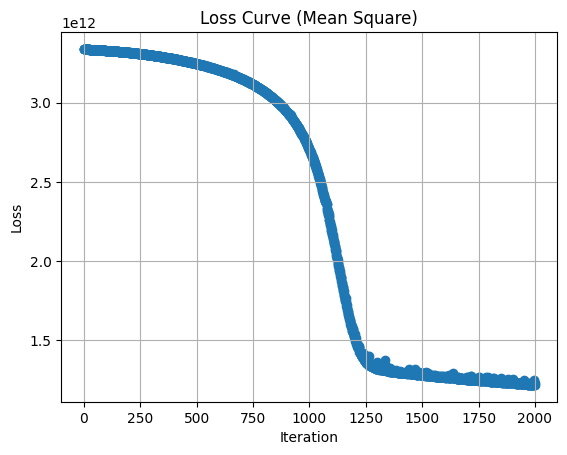

In [8]:
#Plot loss against iterations

plt.scatter(range(max_iter),loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve (Mean Square)')
plt.grid(True)
plt.show()

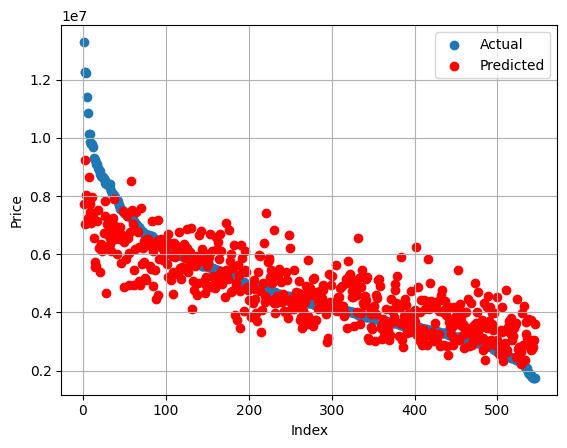

In [9]:
x = [i for i in range(1,len(y)+1)]

plt.scatter(x,y,label='Actual')
plt.scatter(x,y_pred_partial, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()